<a href="https://colab.research.google.com/github/nikhil-xyz/ppf/blob/main/Petrol_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color_pal = sns.color_palette()

Reading the data

In [2]:
df = pd.read_csv('/content/train_data.csv')

In [3]:
df

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [12]:
df[df['Petrol (USD)'].isna()]

,Date,Petrol (USD)
125,10/31/2005,NaN
180,11/20/2006,NaN


removing the null entries

In [13]:
df = df.fillna(method='ffill')

In [14]:
df[df['Petrol (USD)'].isna()]

,Date,Petrol (USD)


In [17]:
df.iloc[123:126]

,Date,Petrol (USD)
123,10/17/2005,94.14
124,10/24/2005,93.47
125,10/31/2005,93.47


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  813 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [19]:
df.tail(50)

,Date,Petrol (USD)
763,1/22/2018,121.50
764,1/29/2018,121.69
765,2/5/2018,121.73
766,2/12/2018,121.58
767,2/19/2018,120.52
768,2/26/2018,119.55
769,3/5/2018,119.29
770,3/12/2018,119.11
771,3/19/2018,119.17
772,3/26/2018,119.23


<Axes: title={'center': 'Petrol Proce Prediction'}, xlabel='Date'>

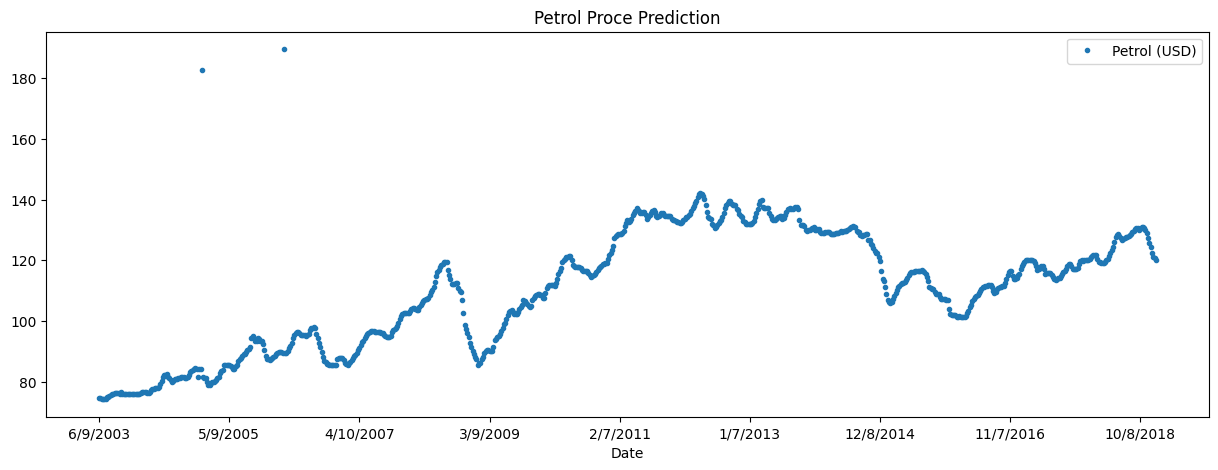

In [20]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Petrol Proce Prediction', x='Date', y='Petrol (USD)')

modifying the feature name from object to datetime

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df['Date']

0     2003-06-09
1     2003-06-16
2     2003-06-23
3     2003-06-30
4     2003-07-07
         ...    
808   2018-12-03
809   2018-12-10
810   2018-12-17
811   2018-12-24
812   2018-12-31
Name: Date, Length: 813, dtype: datetime64[ns]

setting the date as an index column

In [23]:
df.set_index('Date', inplace=True)
df

,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
...,...
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02


In [24]:
type(df)

pandas.core.frame.DataFrame

Resampling the entries. Entries are in given per week. We are converting them to monthly format by summing up the entries.

In [25]:
df1 = df['Petrol (USD)'].resample('M').sum()
df1

Date
2003-06-30    297.83
2003-07-31    298.66
2003-08-31    302.42
2003-09-30    380.79
2003-10-31    304.38
               ...  
2018-08-31    514.38
2018-09-30    521.18
2018-10-31    652.56
2018-11-30    512.22
2018-12-31    608.48
Freq: M, Name: Petrol (USD), Length: 187, dtype: float64

In [26]:
df = df['Petrol (USD)'].resample('MS').sum()

In [27]:
df.tail()

Date
2018-08-01    514.38
2018-09-01    521.18
2018-10-01    652.56
2018-11-01    512.22
2018-12-01    608.48
Freq: MS, Name: Petrol (USD), dtype: float64

In [28]:
type(df)

pandas.core.series.Series

<Axes: xlabel='Date'>

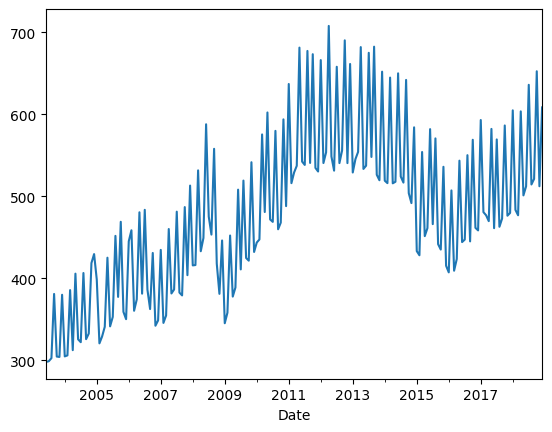

In [29]:
df.plot()

In [30]:
import statsmodels.api as sm

Extracting the trend, season, and residual error from the series

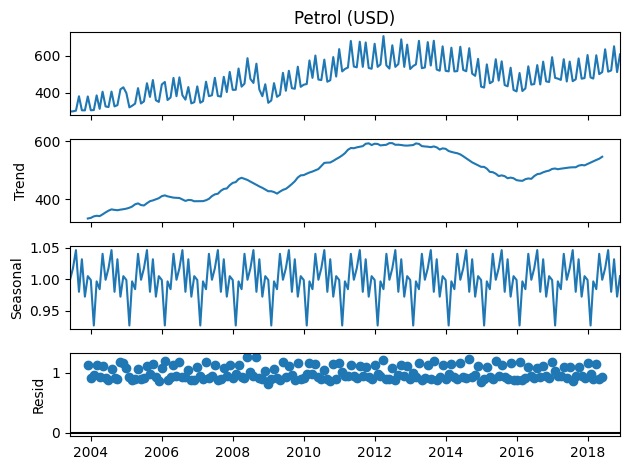

In [31]:
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()
plt.show()

Stationarity check

In [32]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df)
adftest[1]

0.4350813751295903

In [33]:
df.head()

Date
2003-06-01    297.83
2003-07-01    298.66
2003-08-01    302.42
2003-09-01    380.79
2003-10-01    304.38
Freq: MS, Name: Petrol (USD), dtype: float64

Since the result from Adfuller test if above 0.05, we can conclude that the series is non-stationary (Null hypothesis stands and alternate hypothesis is rejected)

Let's apply the differencing operation in order to make the series stationary

In [34]:
df1 = df - df.shift(1)

<Axes: xlabel='Date'>

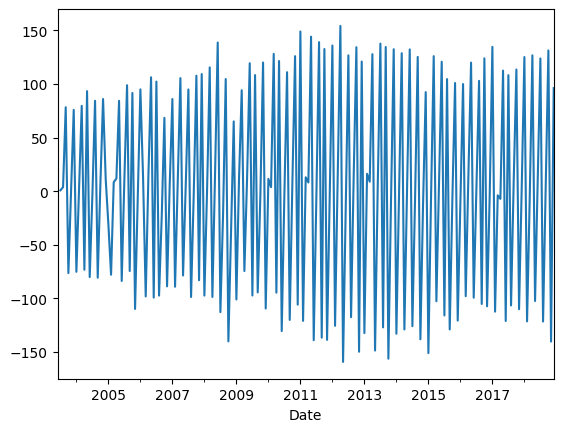

In [35]:
df1.plot()

In [36]:
adftest = adfuller(df1.dropna())
adftest[1]

0.019157253514506256

We will train the series with the ARIMA model with lag value p=3, d=1(differencing value), q=3(previous errors)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

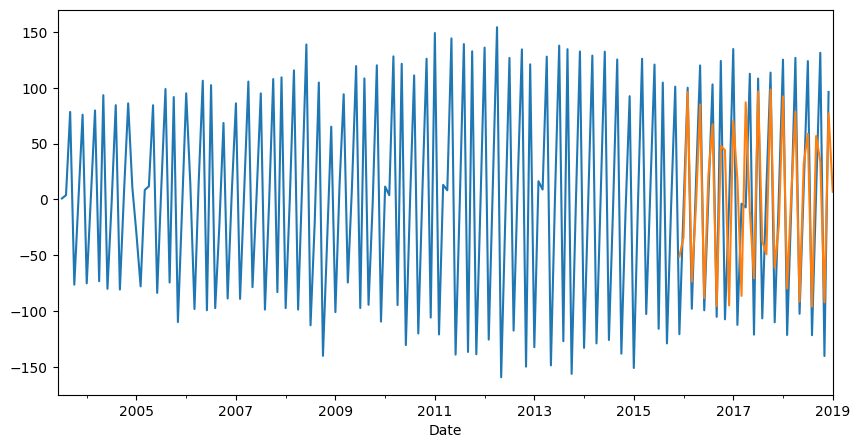

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1,order=(3,0,3))
model_fit=model.fit()
ts1=model_fit.predict(start=150,end=187,dynamic=True)
df1.plot(figsize=(10,5))
ts1.plot()

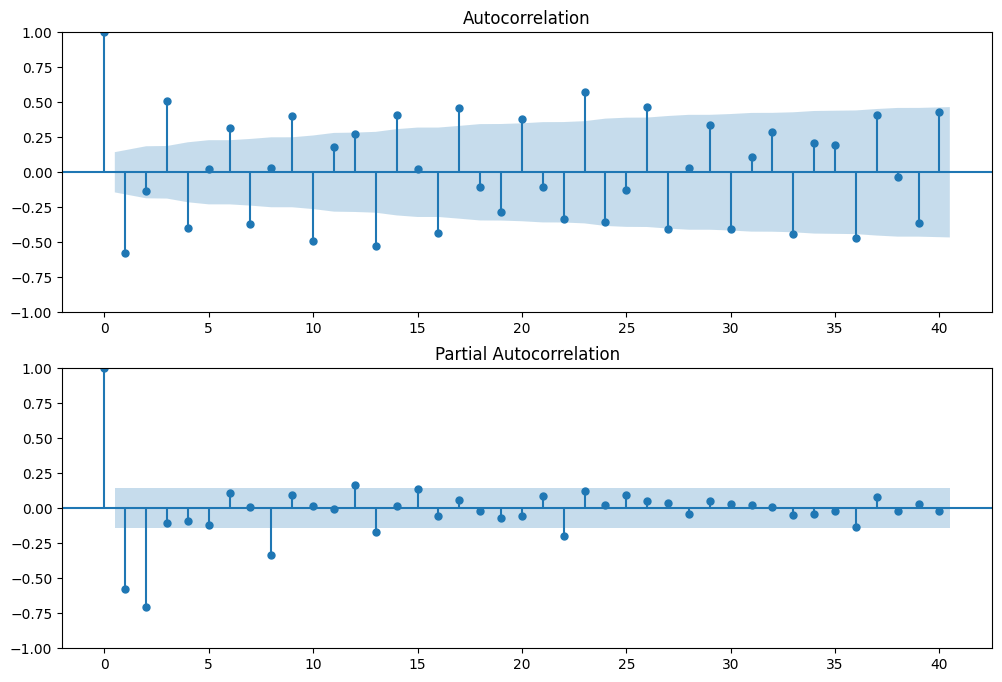

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.iloc[1:],lags=40,ax=ax2)

In [39]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df,order=(3,1,3))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicting for the test dataset

<Axes: xlabel='Date'>

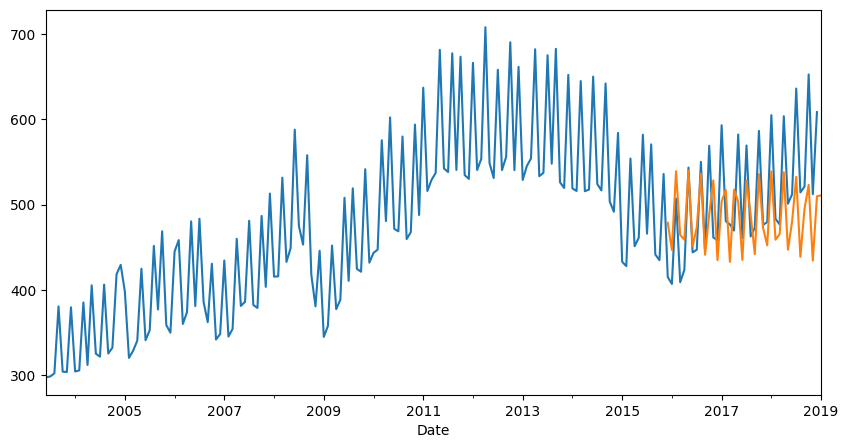

In [40]:
ts=model_fit.predict(start=150,end=187,dynamic=True)
df.plot(figsize=(10,5))
ts.plot()

prediction for the future data

<Axes: xlabel='Date'>

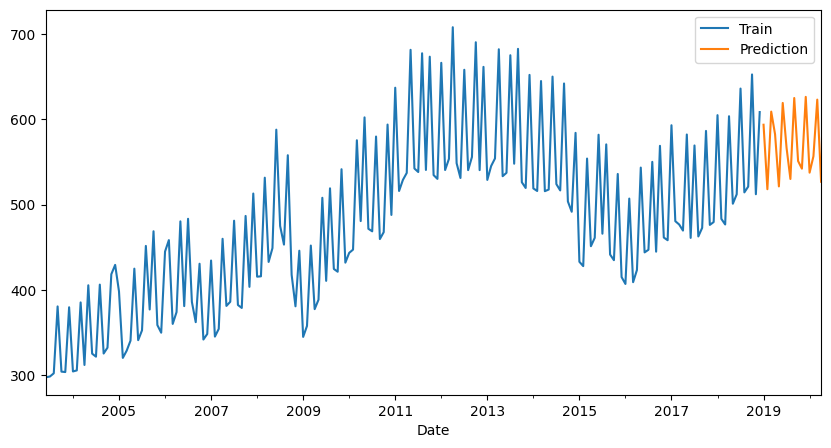

In [41]:
predictions = model_fit.predict(len(df), len(df)+15)
df.plot(legend=True, label='Train', figsize=(10,5))
predictions.plot(legend=True, label='Prediction')

In [42]:
predictions

2019-01-01    593.649452
2019-02-01    518.103570
2019-03-01    608.998152
2019-04-01    582.493533
2019-05-01    521.389696
2019-06-01    619.179078
2019-07-01    566.494399
2019-08-01    530.086626
2019-09-01    624.964433
2019-10-01    551.118811
2019-11-01    542.160439
2019-12-01    626.294830
2020-01-01    537.517993
2020-02-01    556.629570
2020-03-01    623.068393
2020-04-01    526.819194
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
result = pd.DataFrame(predictions)
result.columns = ['Prediction']

In [44]:
result = result.rename_axis('Date')
result

,Prediction
Date,
2019-01-01,593.649452
2019-02-01,518.103570
2019-03-01,608.998152
2019-04-01,582.493533
2019-05-01,521.389696
2019-06-01,619.179078
2019-07-01,566.494399
2019-08-01,530.086626
2019-09-01,624.964433


In [45]:
result.shape

(16, 1)

In [46]:
result.to_csv('ARIMA_result.csv')

In [48]:
test = pd.read_csv('/content/test_data.csv')

In [49]:
test

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN
5,1/6/2019,NaN
6,1/7/2019,NaN
7,1/8/2019,NaN
8,1/9/2019,NaN
9,1/10/2019,NaN


In [50]:
import pickle

In [51]:
pickle.dump(model_fit, open('model.pkl', 'wb'))